# Simulation 1
See README.md for a short description.

### Importing libraries

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

Setting a random seed

In [2]:
np.random.seed(0)

### Defining the number of ports

In [3]:
nports = 4

### Creating the agent and setting the learning options 

In [4]:
agt = agn.Agent(nports)
agt.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

## Simulation 1.1

We run a little number of episodes ($50$). Notice that for each episode, (i) we randomly select a new vulnerable port; (ii) we create a new server; (iii) we reset the environment of the agent; (iv) we run the episode; (v) we print the state-action table.

In [5]:
nepisodes = 50
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport)
    agt.reset(env)
    
    agt.run_episode()
    print(agt.Q)


Game reset
Discovered open port(s)
Discovered open port(s)
Flag captured
[[ 0.99  1.    1.    1.    1.  ]
 [ 0.99 10.99  1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 0.99  0.89  0.89  0.89 10.99]
 [ 0.99 10.99  1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happ

At the end of 50 episodes we notice that the Q-table is slowly taking a diagonal form. However, given the limited number of episodes and the limited number of actions, the agents still thinks it pays off pretty well just to guess from the beginning the vulnerable port.

## Simulation 1.2
We now increase the number of episodes to 500.

In [6]:
nepisodes = 500
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport)
    agt.reset(env)
    
    agt.run_episode()
    print(agt.Q)


Game reset
Nothing happened
Nothing happened
Flag captured
[[16.13678418 47.17097813 47.03836825 54.1665535  58.6690105 ]
 [ 2.770209   40.36458601  1.          1.          1.        ]
 [ 0.99        0.89       20.8801      0.89        0.89      ]
 [ 0.99        0.89        0.89       30.671299    1.        ]
 [ 0.99        6.71867271  0.7019      4.33381274 59.46133075]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[1

Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Flag captured
[[ 54.68191676 106.51583069 107.65681071 100.88558354 101.81323208]
 [  2.770209    96.52230707   1.           1.           1.        ]
 [  0.99         0.89        40.36458601   0.89         0.89      ]
 [  0.99         0.89         0.89        78.17805027   1.        ]
 [  0.99         6.71867271   0.7019       4.33381274 105.557084  ]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 54.68191676 100.80539564 100.77462844 100.88558354 110.79509976]
 [  2.770209    96.52230707   1.           1.           1.        ]
 [  0.99         0.89        40.36458601   0.89         0.89      ]
 [  0.99         0.89         0.89        78.17805027   1.        ]
 [  0.99         6.71867271   0.7019       4.333812

[[126.97068623 139.41604317 129.30401457 130.54802733 129.8869297 ]
 [  2.770209   114.50151316   1.           1.           1.        ]
 [  0.99         4.33381274 114.50151316   4.33381274   0.89      ]
 [  0.99        11.00613618  10.20113756 149.39368668   1.        ]
 [  0.99         6.71867271  28.29930132   4.33381274 215.10753733]]

Game reset
Flag captured
[[126.97068623 139.41604317 129.30401457 140.04066849 129.8869297 ]
 [  2.770209   114.50151316   1.           1.           1.        ]
 [  0.99         4.33381274 114.50151316   4.33381274   0.89      ]
 [  0.99        11.00613618  10.20113756 149.39368668   1.        ]
 [  0.99         6.71867271  28.29930132   4.33381274 215.10753733]]

Game reset
Nothing happened
Flag captured
[[126.97068623 148.02188274 129.30401457 138.5402618  129.8869297 ]
 [  2.770209   114.50151316   1.           1.           1.        ]
 [  0.99         4.33381274 114.50151316   4.33381274   0.89      ]
 [  0.99        11.00613618  10.20113756 149.

Now the Q-table has clearly a diagonal shape. Playing long enough, the agent has learned that the best strategy is to first scan the ports and then directly attack the vulnerable one.

## Simulation 1.3
We now run the agent using a larger set of actions.

In [7]:
nports = 64

agt = agn.Agent(nports)
agt.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)
steps = []
Q_diag = []
Q_ndiag = []

nepisodes = 1000
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport)
    agt.reset(env)
    
    agt.run_episode()
    steps.append(agt.steps)
    Q_diag.append(np.sum(np.diag(agt.Q)))
    Q_ndiag.append(np.sum(agt.Q))


Game reset
Discovered open port(s)
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing

Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Not

Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing ha

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
D

Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(

Reading the Q-table is now unfeasible, so we plot the matrix.

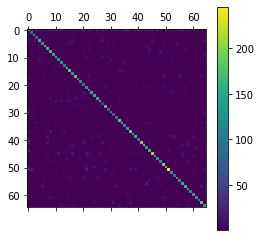

In [8]:
plt.matshow(agt.Q)
plt.colorbar()

The matrix indeed confirm that the agent learned the optimal strategy of scanning and attacking.

We also evaluate the speed and the convergence process of learning assessing how the ratio between the sum of the value on the diagonal of Q and the sum of all values of Q change.

Text(0, 0.5, 'Ratio diagonal/matrix')

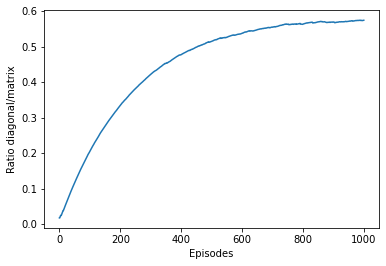

In [9]:
l = np.array(Q_diag) / np.array(Q_ndiag)
plt.plot(range(nepisodes),l)
plt.xlabel('Episodes')
plt.ylabel('Ratio diagonal/matrix')

Finally, we record the number of steps as a function of the number of episodes.

Text(0, 0.5, 'Number of steps')

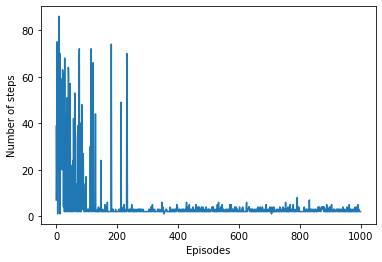

In [10]:
plt.plot(range(nepisodes),steps)
plt.xlabel('Episodes')
plt.ylabel('Number of steps')

## Simulation 1.4
We re-run simulation 1.3 for $100$ times in order to collect statistics

In [11]:
nports = 64
ntrials = 100

steps = np.zeros((ntrials,nepisodes))
Q_diag = np.zeros((ntrials,nepisodes))
Q_ndiag = np.zeros((ntrials,nepisodes))
Qs = np.zeros((ntrials,nports+1,nports+1))

for t in tqdm(range(ntrials)):

    agt = agn.Agent(nports,verbose=False)
    agt.set_learning_options(exploration=0.2, 
                             learningrate=0.1, 
                             discount=0.9, 
                             scanprobability=0.1)

    nepisodes = 1000
    for e in range(nepisodes):

        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport)
        agt.reset(env)

        agt.run_episode()
        
        steps[t,e] = agt.steps
        Q_diag[t,e] = np.sum(np.diag(agt.Q))
        Q_ndiag[t,e] = np.sum(agt.Q)
        Qs[t,:,:] = agt.Q

100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.15it/s]


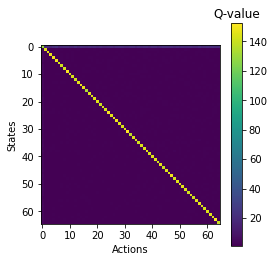

In [12]:
plt.matshow(np.mean(Qs,axis=0))

plt.xlabel('Actions')
plt.ylabel('States')
plt.tick_params(axis='x',bottom=True,top=False,labelbottom=True,labeltop=False)

clb = plt.colorbar()
clb.ax.set_title('Q-value')


plt.savefig('simul1_matrix',dpi=300)

Text(0, 0.5, 'Ratio diagonal/matrix')

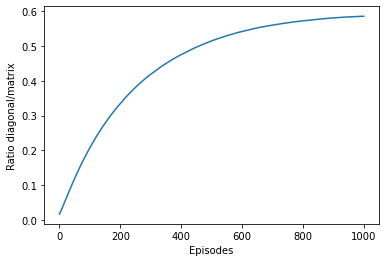

In [13]:
l = np.mean(Q_diag,axis=0) / np.mean(Q_ndiag,axis=0)
plt.plot(range(nepisodes),l)
plt.xlabel('Episodes')
plt.ylabel('Ratio diagonal/matrix')

Text(0, 0.5, 'Number of steps')

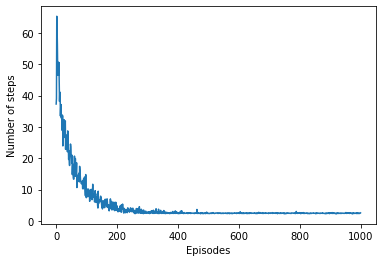

In [14]:
plt.plot(range(nepisodes),np.mean(steps,axis=0))
plt.xlabel('Episodes')
plt.ylabel('Number of steps')

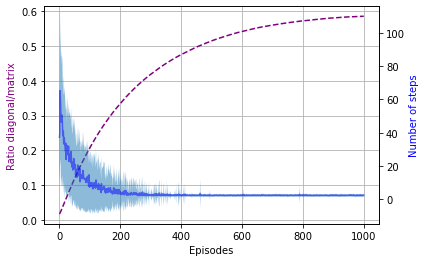

In [15]:
_,ax1 = plt.subplots()
plt.grid()

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Ratio diagonal/matrix',c='purple')
ax1.plot(range(nepisodes),l,c='purple',linestyle='dashed')

ax2 = ax1.twinx()
x = range(nepisodes); y = np.mean(steps,axis=0); ystd = yerr=np.std(steps,axis=0)
ax2.plot(x,y,c='blue',alpha=.5)
ax2.fill_between(x,y-ystd,y+ystd,alpha=.5)
ax2.set_ylabel('Number of steps',c='blue')



plt.savefig('simul1_plots',dpi=300)